# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

In [4]:
var0  = pd.get_dummies(df['var0'],drop_first=True)
var1 = pd.get_dummies(df['var1'],drop_first=True)
var2 = pd.get_dummies(df['var2'],drop_first=True)

df.drop(['var0','var1','var2'],axis=1,inplace=True)
df = pd.concat([df,var0,var1,var2],axis=1)

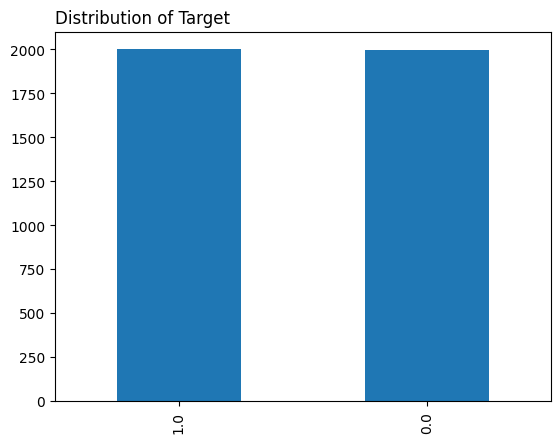

In [5]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49	b	c	e	f	h	i


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

In [7]:
df

,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,...,var47,var48,var49,target,b,c,e,f,h,i
0,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,-1.757573,0.368796,1.622639,...,1.095665,-0.339445,0.470146,1.0,0,0,0,0,0,0
1,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,-0.728646,1.342962,-0.780248,...,4.046193,-1.076047,1.907786,0.0,0,0,0,0,0,1
2,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,-1.089441,0.319463,0.509358,...,0.971048,-0.231717,0.483492,0.0,0,0,0,0,0,0
3,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,0.055919,0.249502,0.594716,...,0.419922,-1.142086,-0.798086,1.0,1,0,1,0,0,1
4,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,0.777411,0.656362,0.263893,...,2.034796,-0.363342,1.131278,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.589869,-0.409426,-0.365865,0.215507,0.510445,0.520399,-0.015319,0.618877,-0.182667,-0.161316,...,-0.506022,0.272254,-0.105495,0.0,0,0,0,1,0,0
3996,-0.461485,0.668115,0.459781,-1.008148,-1.282172,-1.016606,-0.262273,-1.500782,0.451143,0.183707,...,1.421687,-0.184161,0.857790,0.0,0,0,0,0,1,0
3997,1.864010,1.181452,-0.614187,0.020598,-1.033328,-1.337852,0.325350,1.906880,0.377317,-1.191674,...,0.876962,-1.040191,-0.366595,1.0,1,0,0,0,0,0
3998,1.668212,0.596474,1.625167,-1.136471,-1.306467,-0.967885,-0.337609,-0.910395,0.457891,-0.057619,...,1.483866,-0.070736,1.012738,1.0,0,0,0,0,0,0


### Elbow Method

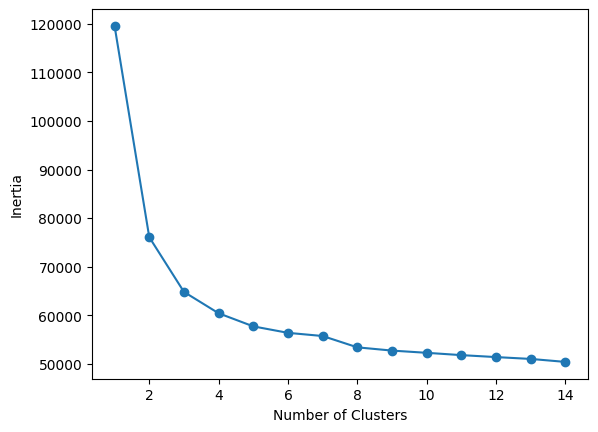

In [8]:
from sklearn.cluster import KMeans

distortions = list()

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km = km.fit(X_train)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Silhouette

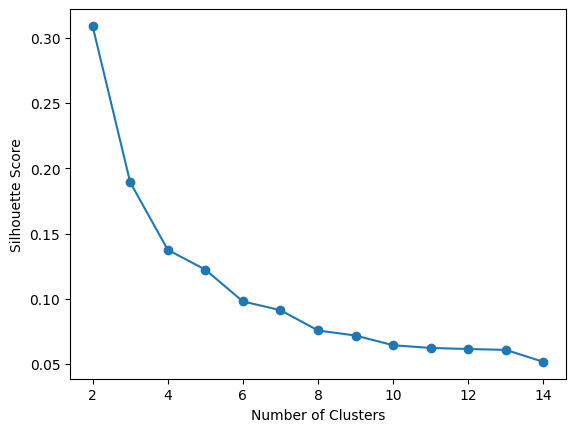

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouettes = list()

for i in range(2, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km = km.fit(X_train)
    s = silhouette_score(X_train, km.labels_)
    silhouettes.append(s)
    
plt.plot(range(2,15), silhouettes, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [10]:
from sklearn.metrics import silhouette_samples

from sklearn.cluster import KMeans

n = 8

km = KMeans(n_clusters=n, random_state=0, n_init='auto')
km = km.fit(X)
pclusters = km.predict(X)

silhouette_vals = silhouette_samples(X, km.labels_)

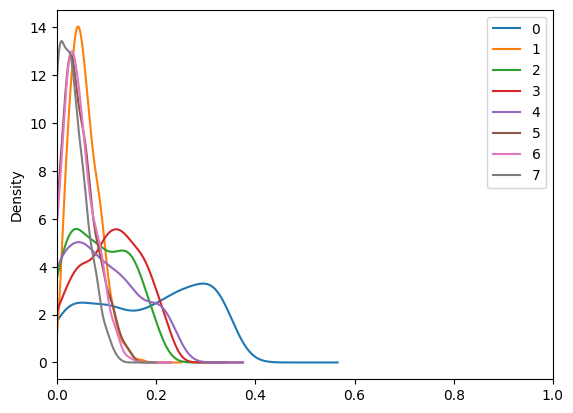

In [11]:
import pandas as pd

s_vals = pd.DataFrame(list(zip(silhouette_vals, km.labels_)))
s_vals.columns = ['silhouette', 'cluster']
s_vals = s_vals.sort_values(by=['cluster', 'silhouette'],
                          ascending=[True, False]
                          )
s_vals['idx'] = pd.Series(range(0,2000))
s_vals['cluster'] = s_vals['cluster'].astype(str)

s_vals.groupby('cluster')['silhouette'].plot.density()
plt.legend()
plt.xlim((0,1))
plt.show()

I choose N = 7 as from the above 2 methods and the above graph at n = 7 which means from 0 to 6 is optimal

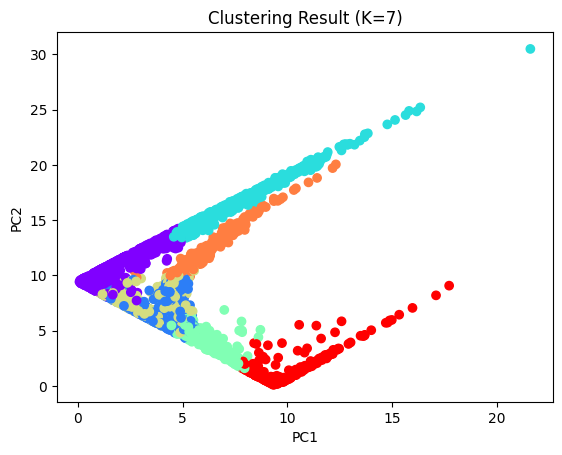

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=7, random_state=0, n_init='auto')


pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=2)),
                 ('kmeans', kmeans)])

pca_X_train = pipe.fit_transform(X_train)

# Perform k-means clustering with 7 clusters
labels = kmeans.fit_predict(X_train)

# Visualize the clustering result with scatterplot
plt.scatter(pca_X_train[:, 0], pca_X_train[:, 1], c=labels, cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Result (K=7)')
plt.show()

>The image enables us to observe how the data points have been divided into distinct groups by the clustering algorithm. However, some of the clusters appear to overlap or have a wide spread, which raises the possibility that the cluster assignments are not entirely clear. Particularly, the purple and green clusters show a lot of overlap, which may indicate that the data points in these clusters share some characteristics. The clustering result, however, appears to reflect some underlying structure in the data and may be helpful for further research.

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [13]:
df = pd.read_csv('clustering-data.csv')
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['var'+str(i) for i in range(3,50)]),
        ('cat', OneHotEncoder(), ['var'+str(i) for i in range(3)])
    ])


#### Using cross-validation and grid search on the regularization strength using best practices.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

p = Pipeline([('preprocessor', preprocessor),
              ('logreg', LogisticRegression(solver='liblinear'))])
p.fit(X_train, y_train)

y_hat = p.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



### ROC Curve Before Grid Search 

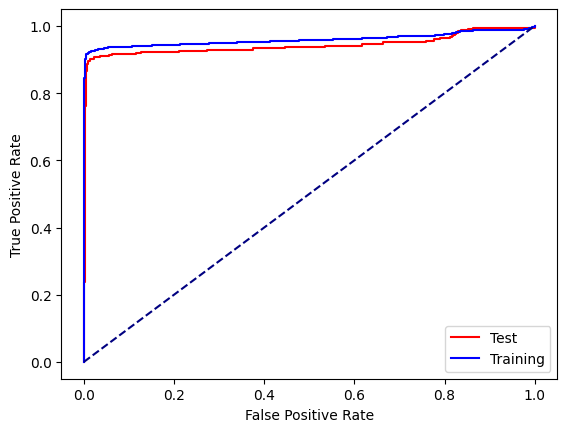

training:  0.959130460258401
testing:  0.9420432097221875


In [16]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=p):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

from sklearn.metrics import roc_auc_score
print ('training: ', roc_auc_score(y_train, generate_probs(X_train)))
print ('testing: ', roc_auc_score(y_test, generate_probs(X_test)))

## Grid Search Cv below and roc on best model

In [17]:
# define the hyperparameters to search over
param_grid = {'logreg__C': [0.01, 0.1, 1, 10]}

## GCV grid search
grid_search = GridSearchCV(p, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['var3',
                                                                          'var4',
                                                                          'var5',
                                                                          'var6',
                                                                          'var7',
                                                                          'var8',
                                                                          'var9',
                                                                          'var10',
                                                                          'var11',
                                                                          'var12',
                                                                          'var13',
                                                                          'var14',
                                                                          'var15',
                                                                          'var16',
                                                                          'var17',
                                                                          'var18',
                                                                          'var19',
                                                                          'var20',
                                                                          'var21',
                                                                          'var22',
                                                                          'var23',
                                                                          'var24',
                                                                          'var25',
                                                                          'var26',
                                                                          'var27',
                                                                          'var28',
                                                                          'var29',
                                                                          'var30',
                                                                          'var31',
                                                                          'var32', ...]),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['var0',
                                                                          'var1',
                                                                          'var2'])])),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10]})

In [18]:
# get the best model and evaluate its performance on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

#### ROC Curve After Grid search 

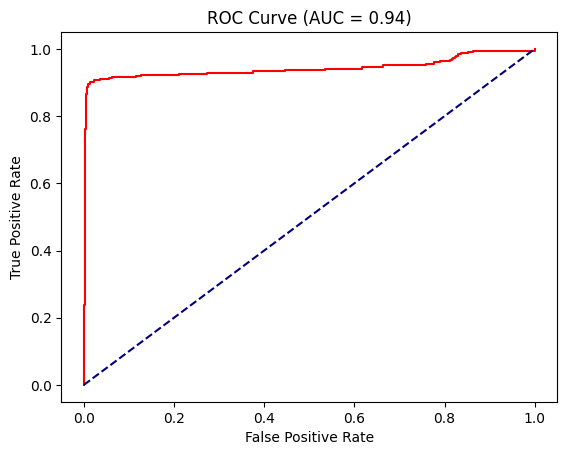

Accuracy: 92.88%
Precision: 99.43%
Recall: 86.45%


In [19]:
probs_test = generate_probs(X_test, model=best_model)
fpr_test, tpr_test = generate_roc(y_test, probs_test)
# plot the ROC curve for test data
plt.plot(fpr_test, tpr_test,'-r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, probs_test)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

# print the performance metrics
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['var'+str(i) for i in range(3,50)]),
        ('cat', OneHotEncoder(), ['var'+str(i) for i in range(3)])
    ])


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

p = Pipeline([('preprocessor', preprocessor),
              ('pca', PCA()),
              ('logreg', LogisticRegression(solver='liblinear'))])
p.fit(X_train, y_train)

y_hat = p.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



#### ROC Curve Before Grid Search

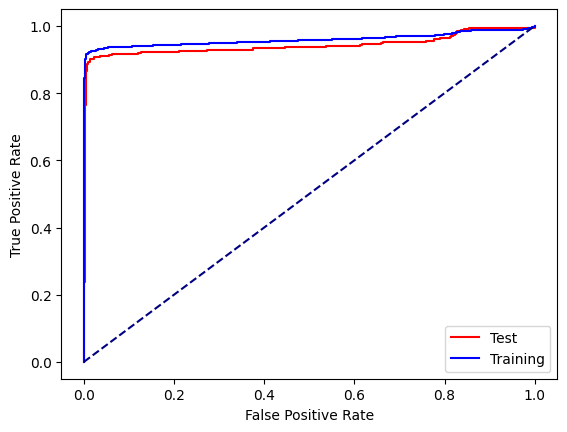

training:  0.9591660074805417
testing:  0.9421244780075516


In [22]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=p):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

from sklearn.metrics import roc_auc_score
print ('training: ', roc_auc_score(y_train, generate_probs(X_train)))
print ('testing: ', roc_auc_score(y_test, generate_probs(X_test)))

In [23]:
# Define the parameter grid for the grid search
param_grid = {
    'pca__n_components': [2, 5, 10,15],
    'logreg__C': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(p, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['var3',
                                                                          'var4',
                                                                          'var5',
                                                                          'var6',
                                                                          'var7',
                                                                          'var8',
                                                                          'var9',
                                                                          'var10',
                                                                          'var11',
                                                                          'var12',
                                                                          'var13',
                                                                          'var14',
                                                                          'var15',
                                                                          'var16',
                                                                          'var17',
                                                                          'var18',
                                                                          'var19',
                                                                          'var20',
                                                                          'var21',
                                                                          'var22',
                                                                          'var23',
                                                                          'var24',
                                                                          'var25',
                                                                          'var26',
                                                                          'var27',
                                                                          'var28',
                                                                          'var29',
                                                                          'var30',
                                                                          'var31',
                                                                          'var32', ...]),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['var0',
                                                                          'var1',
                                                                          'var2'])])),
                                       ('pca', PCA()),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10],
                         'pca__n_components': [2, 5, 10, 15]})

In [24]:
# Get the best model and evaluate its performance on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

#### Generate the ROC curve for the best model

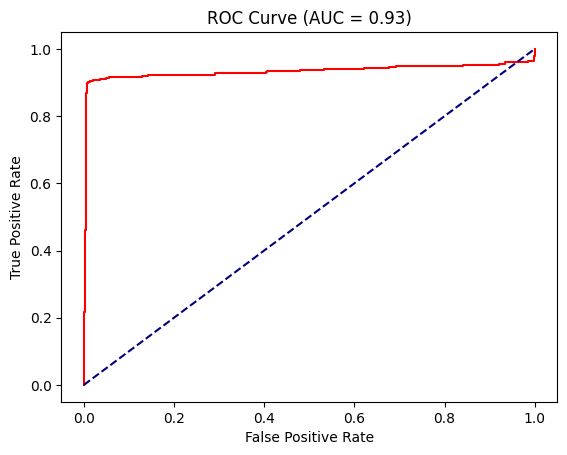

Accuracy: 93.00%
Precision: 99.16%
Recall: 86.95%


In [25]:
probs = generate_probs(X_test, model=best_model)
fpr, tpr = generate_roc(y_test, probs)
# Plot the ROC curve
plt.plot(fpr, tpr, '-r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, probs)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')

>Based on the given metrics, the model seems to perform well. The accuracy of 93% indicates that the model is able to correctly classify the majority of the samples in the test data. The high precision score of 99.16% indicates that the model is able to correctly identify a large proportion of the positive cases (i.e., true positives) out of all the predicted positives (i.e., true positives and false positives). The recall score of 86.95% indicates that the model is able to correctly identify a large proportion of the positive cases out of all the actual positives (i.e., true positives and false negatives). The AUC score of 0.93 suggests that the model is able to discriminate well between the positive and negative classes.

> However, it's important to note that the evaluation of model performance depends on the specific problem domain and the costs associated with false positives and false negatives.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['var'+str(i) for i in range(3,50)]),
        ('cat', OneHotEncoder(), ['var'+str(i) for i in range(3)])
    ])

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

p = Pipeline([('preprocessor', preprocessor),
              ('pca', PCA()),
              ('kmeans', KMeans(n_clusters=7, random_state=0, n_init='auto')),
              ('logreg', LogisticRegression(solver='liblinear'))])
p.fit(X_train, y_train)

y_hat = p.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       394
         1.0       0.99      0.89      0.94       406

    accuracy                           0.94       800
   macro avg       0.95      0.94      0.94       800
weighted avg       0.95      0.94      0.94       800



#### ROC Curve Before Grid Search

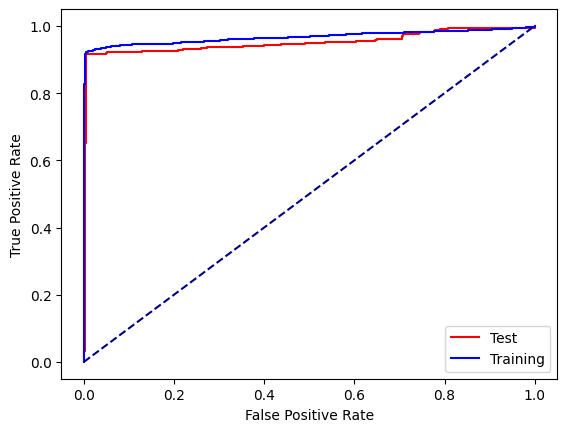

training:  0.9668164728171174
testing:  0.9505513740591633


In [28]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=p):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

from sklearn.metrics import roc_auc_score
print ('training: ', roc_auc_score(y_train, generate_probs(X_train)))
print ('testing: ', roc_auc_score(y_test, generate_probs(X_test)))

In [29]:
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5, 6,7],
    'pca__n_components': [2, 5, 10,15],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(p, param_grid=param_grid, cv=5, n_jobs=-1, scoring="roc_auc")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['var3',
                                                                          'var4',
                                                                          'var5',
                                                                          'var6',
                                                                          'var7',
                                                                          'var8',
                                                                          'var9',
                                                                          'var10',
                                                                          'var11',
                                                                          'var12',
                                                                          'var13',
                                                                          'var14',
                                                                          'var15',
                                                                          'var16',
                                                                          'var17',
                                                                          'var18',
                                                                          'var19',
                                                                          'var20',
                                                                          'var21',
                                                                          'var22',
                                                                          'var23',
                                                                          'var24',
                                                                          'var25',
                                                                          'var26',
                                                                          'var27',
                                                                          'var28',
                                                                          'var29',
                                                                          'var30',
                                                                          'var31',
                                                                          'var32', ...]),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['var0',
                                                                          'var1',
                                                                          'var2'])])),
                                       ('pca', PCA()),
                                       ('kmeans',
                                        KMeans(n_clusters=7, n_init='auto',
                                               random_state=0)),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'kmeans__n_clusters': [2, 3, 4, 5, 6, 7],
                         'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'pca__n_components': [2, 5, 10, 15]},
             scoring='roc_auc')

Generate the ROC curve for the best model

In [30]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

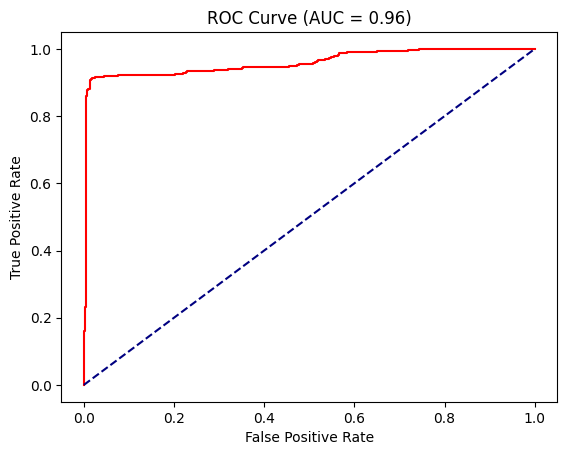

Accuracy: 94.00%
Precision: 98.64%
Recall: 89.41%


In [31]:
probs = generate_probs(X_test, model=best_model)
fpr, tpr = generate_roc(y_test, probs)
# Plot the ROC curve
plt.plot(fpr, tpr, '-r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, probs)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')

Insert conclusions

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

> As we can see the above graphs , we can clearly say that a logistic regression with pca and kmeans is giving us a accurate solutions . I have done all the coding above with respect to ROC curves before and after generating the grid search with the following plotting of grpahs with respective classicification report . where 0.94-0.95 stands out as the highest and would be the best model and i would recommend to use that.


              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       394
         1.0       0.99      0.89      0.94       406

    accuracy                           0.94       800
   macro avg       0.95      0.94      0.94       800
weighted avg       0.95      0.94      0.94       800



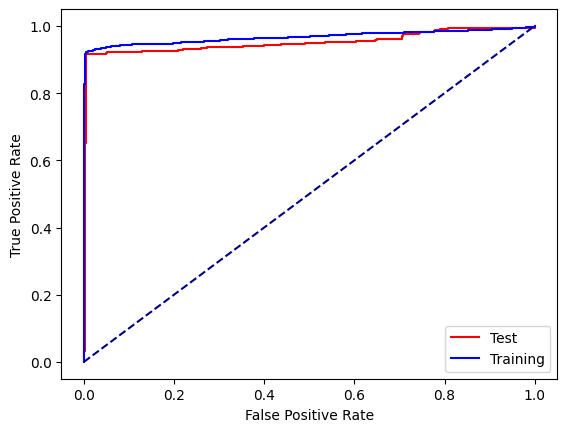

Accuracy: 94.00%
Precision: 98.64%
Recall: 89.41%


In [32]:
# Define the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

p = Pipeline([('preprocessor', preprocessor),
              ('pca', PCA()),
              ('kmeans', KMeans(n_clusters=7, random_state=0, n_init='auto')),
              ('logreg', LogisticRegression(solver='liblinear'))])
p.fit(X_train, y_train)

y_hat = p.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))
# Define the parameter grid
param_grid = {
    'kmeans__n_clusters': [2, 3, 4,5,6,7],
    'logreg__C': [0.1, 1, 10,100]
}

from sklearn.metrics import roc_curve

def generate_probs(X, model=p):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')